In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import signal
import time
import datetime
import serial
from scipy.fftpack import fft,ifft
from matplotlib.pylab import mpl
import struct
import os
import serial
import binascii
from fun_chy2 import *

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [1]:
!python.exe -m PyQt5.uic.pyuic Automated_testingV1.5.ui -o Automated_testingV15.py

In [2]:
!python.exe -m PyQt5.uic.pyuic sample_testingV1.32.ui -o sample_testingV13.py

In [27]:
!python.exe -m PyQt5.uic.pyuic sample_testingV1.3.ui -o sample_testingV13.py

In [3]:
# xxxwrj 无人机惯导
def re_strings(data):
    split_num = 2
    crc_data = data
    lists = [crc_data[i*split_num:i*split_num+split_num].upper() for i in range(len(crc_data)//split_num)]
    return ''.join(lists[::-1])
# print(re_strings('0123456789'))

strings = ''
strings+='90EB'
strings+='1600' # 总字节-5

# strings+='0080' #北斗/GNSS 北斗
# strings+='0040' #北斗/GNSS GNSS
# strings+='0020'     # 混合
strings+='00A0' #北斗/GNSS 组合导航

# strings+=re_strings('8000')     # 指令字-对准
strings+=re_strings('8000')     # 指令字-对准

loc1 = 116.50270
loc2 = 39.73155
loc3 = 20
# loc1 = 0
# loc2 = 0
# loc3 = 0
strings+=re_strings(hex(int(loc1/90*1073741824))[2:].rjust(8,'0'))
strings+=re_strings(hex(int(loc2/90*1073741824))[2:].rjust(8,'0'))
strings+=re_strings(hex(int(loc3/16384*1073741824))[2:].rjust(8,'0'))
for i in range(3):
    strings+='0000'


split_num = 2
crc_data = strings
lists = [crc_data[i*split_num:i*split_num+split_num].upper() for i in range(len(crc_data)//split_num)]
int_lists = [int(num,16) for num in lists]
# print(len(int_lists[2:]))
checks = hex(sum(int_lists[2:]))[2:].rjust(2,'0')[-2:]
lists.append(checks.upper())
counts = []
for i in range(27):
    counts.append(str(i).rjust(2,'0'))
print(' '.join(counts))
print(' '.join(lists))
print('总长度:{}'.format(len(lists)))

00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
90 EB 16 00 00 A0 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 29
总长度:27


In [10]:
90 EB 16 00 00 A0 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 29

# 组合导航 BD+GNSS
90 EB 16 00 00 E0 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 69
# 组合导航 切换GNSS
90 EB 16 00 00 60 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 E9
# 组合导航 切换BD
90 EB 16 00 00 A0 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 29

# 纯惯 切换BD
90 EB 16 00 00 80 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 09
# 纯惯 切换GNSS
90 EB 16 00 00 40 00 80 57 AB D8 52 6F E8 40 1C 00 00 14 00 00 00 00 00 00 00 C9


'0x509'

In [15]:
text = '''#DRPVAA,COM1,0,92.0,FINE,1867,111471.800,00000000,14,0;SOL_COMPUTED,SINGLE
,WGS84,0,0,0,0,0.800,2573.000,40.07899836523,116.23661722090,68.5569,-
9.7848,0.1522,0.1489,0.0213,-0.0001,-0.0001,0.0010,0.0096,0.0097,0.0097,359.589710,-
1.236787,1.344697,0.0000,0.0020,0.0020,1,0,0,0,0.0000,0.0000,0.0000,0.0000,0.000000,0.
000000,0.000000,0.000000*9aa8b508'''
text = text.replace('\n','')
data = text[1:].split('*')[0]
crc = text[1:].split('*')[1]
print(data)
print(len(data.split(',')))
print(crc)
crc = binascii.crc32(data.encode('ascii'))
print(crc)
print(hex(crc))
crc2 = calculate_crc32(data.encode('ascii'))
print(crc2)
print(hex(crc2))

DRPVAA,COM1,0,92.0,FINE,1867,111471.800,00000000,14,0;SOL_COMPUTED,SINGLE,WGS84,0,0,0,0,0.800,2573.000,40.07899836523,116.23661722090,68.5569,-9.7848,0.1522,0.1489,0.0213,-0.0001,-0.0001,0.0010,0.0096,0.0097,0.0097,359.589710,-1.236787,1.344697,0.0000,0.0020,0.0020,1,0,0,0,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000
49
9aa8b508
3482309119
0xcf8fd1ff
2594747656
0x9aa8b508


In [24]:
text = 'HEADINGA,COM1,0,0.0,0,0,0.000,0,0,0;,INSUFFICIENT_OBS,NONE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"0",0,0,0,0,0,00,0,0'
print(len(text.split(',')))
crc2 = calculate_crc32(text.encode('ascii'))
print(crc2)
print(hex(crc2))

27
1952116701
0x745aefdd


In [14]:
counts = False
print(not counts)

True


In [2]:
import struct
encode_type_list = 'BBBBIiihhhhiiiiiiiiihHHHhhiB'
encode_para_list = [1,1,1,1,1,
    8.38190318e-8,4.19095159e-8,1,
    0.01,0.01,0.01,
    9.31322575e-8,9.31322575e-8,9.31322575e-8,
    8.38190318e-8,8.38190318e-8,8.38190318e-8,
    2.32830644e-7,2.32830644e-7,2.32830644e-7,
    1,0.0625,1/256,1/256,1,0.01,9.31322575e-8,1]
encode_data_list = [0 for i in range(len(encode_para_list))]
encode_data_list[0] = 0x55
encode_data_list[1] = 0xAA
encode_data_list[2] = 0x49
encode_data_list[3] = 0x22
encode_data_list[4] = 0x01
# 经纬高
encode_data_list[5] = 88.431022
encode_data_list[6] = 39.724185
encode_data_list[7] = 1700
# encode_data_list[5] = 116.147325800
# encode_data_list[6] = 39.821300500
# encode_data_list[7] = 65
# 东北垂
encode_data_list[8] = 181.66
encode_data_list[9] = 32.03
encode_data_list[10] = 0.00
# XYZ加速度
encode_data_list[11] = 0
encode_data_list[12] = 9.806602
encode_data_list[13] = 0
# 姿态角
encode_data_list[14] = 0
encode_data_list[15] = 0
encode_data_list[16] = -79.981835
# XYZ角速度
encode_data_list[17] = 0.0
encode_data_list[18] = 0.0
encode_data_list[19] = 0.0
# 气压高度
encode_data_list[20] = 1700
# 马赫数
encode_data_list[21] = 603.8125
# 静压
encode_data_list[22] = 180
# 总压
encode_data_list[23] = 64
# 卫星高频高度
encode_data_list[24] = 1700
# 卫星高频垂速
encode_data_list[25] = 0
# 天向加速度
encode_data_list[26] = 0
# 校验
encode_data_list[27] = 0
# print(len(encode_type_list))
# print(len(encode_para_list))
for i in range(len(encode_data_list)):
    encode_data_list[i] = int(encode_data_list[i]/encode_para_list[i])
    encode_data_list[i] = struct.pack('<'+encode_type_list[i],encode_data_list[i]).hex()
    # encode_data_list[i] = encode_data_list[i].hex()
check_list = ''.join(encode_data_list[2:27])
check_list = [check_list[i*2:i*2+2] for i in range(len(check_list)//2)]
# print(len(check_list))
sum_check = hex(sum([int(i,16) for i in check_list]))[2:].rjust(2,'0')[-2:]
check_list.append(sum_check)
check_list = ['55','AA']+check_list
print(' '.join(check_list))


55 AA 49 22 01 00 00 00 52 60 e2 3e 65 22 7f 38 a4 06 f6 46 83 0c 00 00 00 00 00 00 b3 b6 46 06 00 00 00 00 00 00 00 00 00 00 00 00 55 c0 1f c7 00 00 00 00 00 00 00 00 00 00 00 00 a4 06 bd 25 00 b4 00 40 a4 06 00 00 00 00 00 00 cb


In [18]:
import os 
if os.path.exists('./data.txt'):
    print(True)

True


In [ ]:
55 AA 49 22 02 00 00 00 b2 c5 97 52 7f 50 a2 38 5a 00 00 00 00 00 00 00 b6 15 fb ff 26 bf 45 06 16 9f 02 00 65 3b df ff aa cb ed ff 7a 5e 04 40 dd 24 06 01 14 ae 47 01 4b 37 89 01 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 95

In [48]:
print(len(check_list))
print(check_list)

77
['55', 'AA', '49', '22', '01', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '00', '6c']


In [27]:
len('55 AA 97 00 00 00 02 0F 00 01 12 18 34 9D CA B0 33 4E FD F9 B4 79 ED E1 39 5D F3 4D 38 66 07 AF BD 48 82 91 02 31 02 29 02 2C 02 11 02 0C 00 00 00 00 10 00 00 08 05 00 00 10 80 00 01 01 C0 FF 66 99 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 AA BB 17 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 17 00 00 00 00 C0 FF ')//3

320

2
3
4
5
6
7
8
9
10


In [4]:
decode  = class_rule()
with open('./解算规则/32_综控仿真发送.txt','r',encoding='gb2312') as f:
    data = f.read()
decode.read_rule_file(data)

(True, '解算完成')

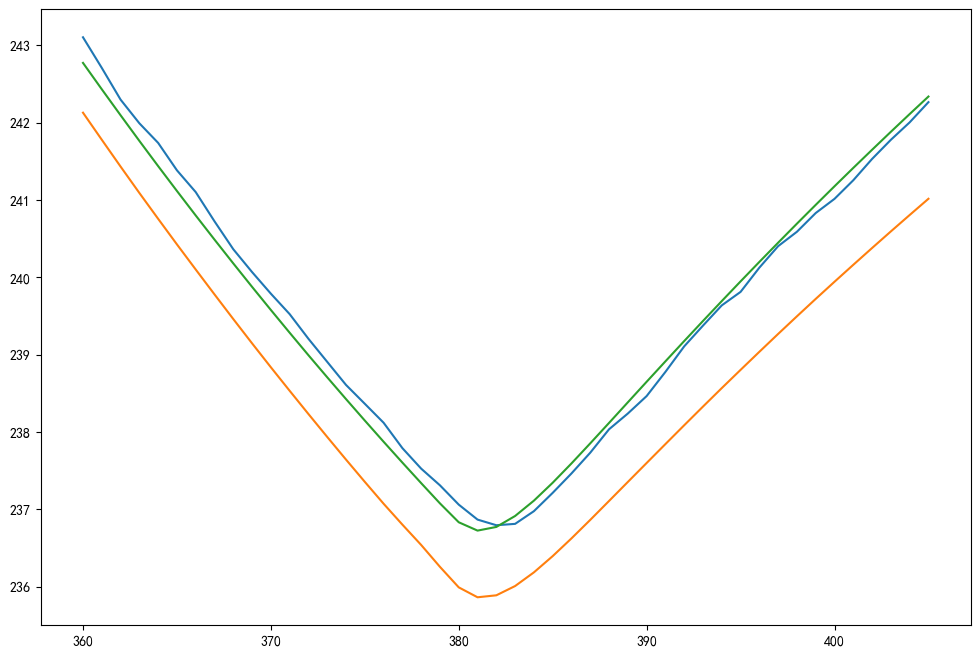

In [18]:
filename = './测试数据/202501/04/LG98_三院_仿真遥测随动_195944_s.txt'
df = pd.read_csv(filename,sep='\\s+',header=None,skiprows=1)
# df = df[360:-400]
df = df[250:]
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(np.sqrt(df[26]**2+df[27]**2))
plt.plot(np.sqrt(df[44]**2+df[45]**2))
plt.plot(np.sqrt(df[57]**2+df[58]**2))

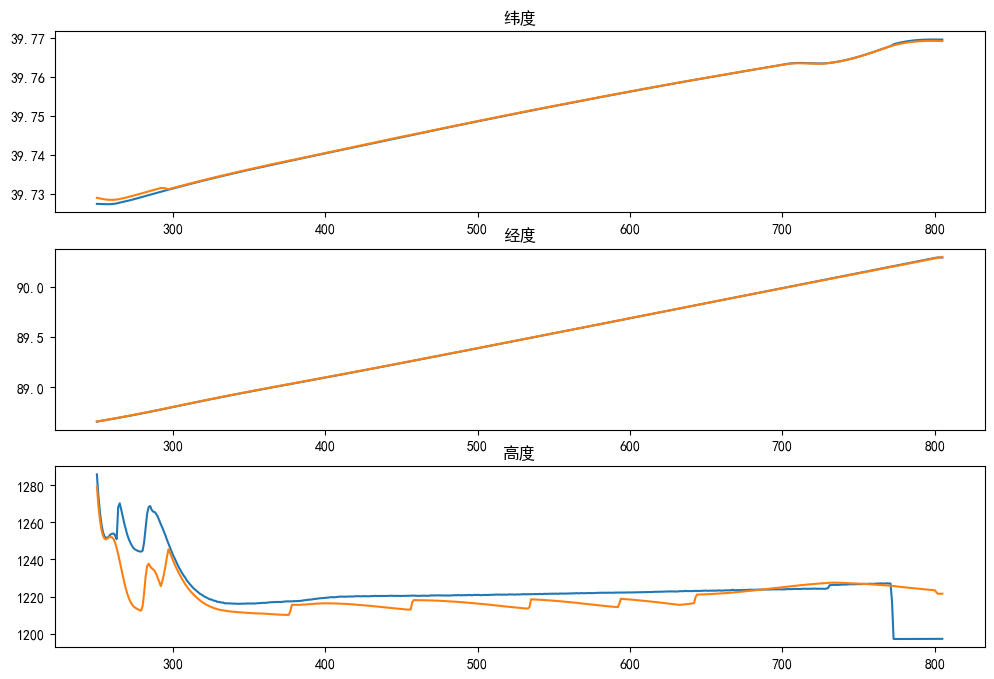

In [16]:
filename = './测试数据/202501/04/LG98_三院_仿真遥测随动_195944_s.txt'
df = pd.read_csv(filename,sep='\\s+',header=None,skiprows=1)
# df = df[360:-400]
df = df[250:]
fig,ax = plt.subplots(3,1,figsize=(12,8))

# tlist = ['俯仰','横滚','偏航']
# lists = [47,60]


# tlist = ['东速','北速','天速']
# lists = [26,44,57]

tlist = ['纬度','经度','高度']
lists = [23,41,54]
for j in range(3):
	for i in range(2):
		ax[j].plot(df[lists[i]+j])
		ax[j].set_title(tlist[j])

In [1]:
def lat_lon2str(float_data):
    float_data = float(float_data)
    int_data = int(float_data)
    frac_data = float_data - int_data
    return (int_data+frac_data*0.6)*100
lat_lon2str(39.43)

3925.8

In [11]:
test = '$GNGGA,072820.800,3943.91626718,N,11630.17567593,E,1,19,0.714,45.422,M,-10.106,M,,,1.060*55'
def sate2location(sate_data):
    try:
        sate_data = float(sate_data)
        int_date = sate_data//100
        float_date = (sate_data-int_date*100)/60
        return int_date+float_date
    except Exception as e:
        print('{} {}|'.format(sate_data,e))
        return 0
def GPGGA2loc(strings):
    try:
        strings = strings.split(',')
        if len(strings)<6: return 0
        if strings[2]=='' or strings[4]=='' or strings[6]=='' or strings[7]=='':
            return 0
        else:
            lat = sate2location(strings[2])
            lon = sate2location(strings[4])
            return [lat,lon]
    except Exception as e:
        print('GPGGA2loc:{}'.format(e))
        return [0,0]
a,b = GPGGA2loc(test)
print(a)
print(b)

39.73193778633333
116.50292793216667


In [12]:
defalut_KSXT = [0]*6
defalut_KSXT

[0, 0, 0, 0, 0, 0]